   # Twitter Data Analysis 

We will make use of the following libraries: **pandas, numpy, json, datetime, matplotlib**

In [71]:
import datetime
import pandas as pd
import numpy as np
import json
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
TWEETS_FILE_PATH = r'PATH'
USERS_FILE_PATH = r'PATH'
tweets_data = pd.read_csv(TWEETS_FILE_PATH, encoding = "ISO-8859-1")
users_data = pd.read_csv(USERS_FILE_PATH, encoding = "ISO-8859-1")

## Data Cleaning

After reading the data in Python, we would like to get an idea about the data structure (null values, length etc.).

### Data cleaning of "tweets_data"

Let's take a look at tweets:

In [13]:
tweets_data.head()

,user_id,tweet_id,text,created at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang
0,13679.0,1320000000000000000,@hassankhan Very likely! The pattern is usuall...,Wed Oct 28 06:09:25 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en
1,13679.0,1330000000000000000,"Over the past 8 months, HHS &amp; CDC has been...",Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en
2,13679.0,1330000000000000000,The Open Government Data Act signed into law b...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en
3,13679.0,1330000000000000000,I often get asked if there are any *legal* or ...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en
4,13679.0,1330000000000000000,My last plea. Before handing the baton to the ...,Tue Nov 17 19:02:10 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,True,6.0,en


In [14]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77452 entries, 0 to 77451
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          77452 non-null  float64
 1   tweet_id         77452 non-null  int64  
 2   text             77452 non-null  object 
 3   created at       77452 non-null  object 
 4   entities         77452 non-null  object 
 5   hashtags         77452 non-null  object 
 6   source           77452 non-null  object 
 7   geo              313 non-null    object 
 8   is_quote_status  77452 non-null  bool   
 9   retweet_count    77452 non-null  float64
 10  lang             77452 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 6.0+ MB


Rename created at column to 'created_at':

In [15]:
tweets_data = tweets_data.rename(columns={'created at':'created_at'})

There are instances where there is no date specified ("-") - we filter these out:

In [16]:
tweets_data = tweets_data[tweets_data.created_at != '-'].reset_index(drop=True)

Next, we want to make sure that we keep only ID's that are in the users data.<br>We inner join with user_id column in users data to get rid of irrelevant IDs:

In [17]:
users_user_IDs = users_data[['user_id']] #df only with user_id

tweets_data = users_user_IDs.merge(tweets_data, on='user_id', how='inner')

In [18]:
tweets_data['user_id'].value_counts()

57768217      400
16742053      400
163570705     400
23607273      400
1430581447    400
             ... 
224661284       2
1412145416      2
34765906        2
816373280       2
1726625022      2
Name: user_id, Length: 541, dtype: int64

Now we see that there are 541 unique IDs in tweets (less than in users).<br>
For matching both of the data frames, we will need to do another inner join, between the user ids from tweets and the entire users dataframe. This we will do in the User_data cleaning section. 

Problem with data: a user cannot tweet two tweets at the **same time**. <br> So, the tweets data's unique key is hereby defined by user_id + date & time ('**created_at**'). <br>
(Users data unique key is **user_id**).<br>


Dropping duplicate rows, by our defined key:

In [19]:
tweets_data = tweets_data.drop_duplicates(subset=['user_id', 'created_at'], keep='first').reset_index(drop=True)

The data structure with the key:

In [20]:
tweets_data.set_index(['user_id', 'created_at'])


tweet_id  \
user_id    created_at                                            
1322535270 Fri Nov 01 11:15:10 +0000 2013   396000000000000000   
           Thu Oct 31 14:14:58 +0000 2013   396000000000000000   
           Thu Oct 31 14:49:38 +0000 2013   396000000000000000   
           Tue Apr 02 14:16:03 +0000 2013   319000000000000000   
701561502  Wed Jul 18 21:04:24 +0000 2012   226000000000000000   
...                                                        ...   
163570705  Mon Jun 01 18:26:06 +0000 2020  1270000000000000000   
           Sun Jun 21 16:42:18 +0000 2020  1270000000000000000   
           Fri May 29 20:20:42 +0000 2020  1270000000000000000   
           Thu Jun 04 19:29:47 +0000 2020  1270000000000000000   
           Thu Jun 18 14:48:03 +0000 2020  1270000000000000000   

                                                                                        text  \
user_id    created_at                                                                          
1322535270 Fri Nov 01 11:15:10 +0000 2013         RT @Desyfitrhiani: @AndhyNautika follback.   
           Thu Oct 31 14:14:58 +0000 2013           RT @agooez_48: I don't know,who you are.   
           Thu Oct 31 14:49:38 +0000 2013          RT @indha: love u so much......Arie......   
           Tue Apr 02 14:16:03 +0000 2013                               @agooez_48 foollback   
701561502  Wed Jul 18 21:04:24 +0000 2012    I don't even know how too use this ..\n smh -_-   
...                                                                                      ...   
163570705  Mon Jun 01 18:26:06 +0000 2020  RT @BryanLowry3: .@repcleaver at today's #Geor...   
           Sun Jun 21 16:42:18 +0000 2020  RT @EvanCleaver: My fav pic of my Dad and I. R...   
           Fri May 29 20:20:42 +0000 2020  RT @MizzouBLSA: In re Being Black in America \...   
           Thu Jun 04 19:29:47 +0000 2020  In honor of #MomsEqualPay Day, let?s push fo...   
           Thu Jun 18 14:48:03 +0000 2020  #HomeIsHere for nearly 700,000 #Dreamers.\n \n...   

                                                                                    entities  \
user_id    created_at                                                                          
1322535270 Fri Nov 01 11:15:10 +0000 2013  {"hashtags": [], "symbols": [], "user_mentions...   
           Thu Oct 31 14:14:58 +0000 2013  {"hashtags": [], "symbols": [], "user_mentions...   
           Thu Oct 31 14:49:38 +0000 2013  {"hashtags": [], "symbols": [], "user_mentions...   
           Tue Apr 02 14:16:03 +0000 2013  {"hashtags": [], "symbols": [], "user_mentions...   
701561502  Wed Jul 18 21:04:24 +0000 2012  {"hashtags": [], "symbols": [], "user_mentions...   
...                                                                                      ...   
163570705  Mon Jun 01 18:26:06 +0000 2020  {"hashtags": [{"text": "GeorgeFloydProtest", "...   
           Sun Jun 21 16:42:18 +0000 2020  {"hashtags": [{"text": "FathersDay", "indices"...   
           Fri May 29 20:20:42 +0000 2020  {"hashtags": [{"text": "BlackLivesMatter", "in...   
           Thu Jun 04 19:29:47 +0000 2020  {"hashtags": [{"text": "MomsEqualPay", "indice...   
           Thu Jun 18 14:48:03 +0000 2020  {"hashtags": [{"text": "HomeIsHere", "indices"...   

                                                                                    hashtags  \
user_id    created_at                                                                          
1322535270 Fri Nov 01 11:15:10 +0000 2013                                                 []   
           Thu Oct 31 14:14:58 +0000 2013                                                 []   
           Thu Oct 31 14:49:38 +0000 2013                                                 []   
           Tue Apr 02 14:16:03 +0000 2013                                                 []   
701561502  Wed Jul 18 21:04:24 +0000 2012                                                 []   
...                      

~ 40k rows dropped from tweets after cleaning.

###  Data Cleaning of "Users_data"

In [21]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 598 non-null    int64 
 1   name                    598 non-null    object
 2   screen_name             598 non-null    object
 3   location                371 non-null    object
 4   description             474 non-null    object
 5   entities                598 non-null    object
 6   protected               598 non-null    int64 
 7   followers_count         598 non-null    int64 
 8   friends_count           598 non-null    int64 
 9   listed_count            598 non-null    int64 
 10  favourites_count        598 non-null    int64 
 11  geo_enabled             598 non-null    int64 
 12  statuses_count          598 non-null    int64 
 13  shared_location         598 non-null    int64 
 14  shared_profile_picture  598 non-null    int64 
 15  desc_w

Dropping duplicate rows by key (user_id):

In [22]:
users_data = users_data.drop_duplicates(subset = 'user_id',keep='first').reset_index(drop=True)

In [23]:
len(users_data)

598

 0 rows dropped.

Merging (inner) user_ids from tweets data with users dataframe for matching number of user_ids:

In [24]:
tweets_user_IDs = tweets_data[['user_id']].drop_duplicates().reset_index(drop=True)
users_data = tweets_user_IDs.merge(users_data,on='user_id', how='inner')

In [25]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 541 non-null    int64 
 1   name                    541 non-null    object
 2   screen_name             541 non-null    object
 3   location                332 non-null    object
 4   description             419 non-null    object
 5   entities                541 non-null    object
 6   protected               541 non-null    int64 
 7   followers_count         541 non-null    int64 
 8   friends_count           541 non-null    int64 
 9   listed_count            541 non-null    int64 
 10  favourites_count        541 non-null    int64 
 11  geo_enabled             541 non-null    int64 
 12  statuses_count          541 non-null    int64 
 13  shared_location         541 non-null    int64 
 14  shared_profile_picture  541 non-null    int64 
 15  desc_w

~50 IDs filtered ==> now tweets data's user IDs are the same as the users data.

### Question 1

**1.1:** For counting the number of hashtags, we applied the **loads** function from json library that basically translates the data from String to a the actual object (here: a list of dictionaries). 
After that, we applied len() for counting the number of dictionaries in each list.

In [26]:
tweets_data["hashtag_count"] = tweets_data["hashtags"].apply(json.loads).apply(len)
tweets_data.head()

,user_id,tweet_id,text,created_at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang,hashtag_count
0,1322535270,396000000000000000,RT @Desyfitrhiani: @AndhyNautika follback.,Fri Nov 01 11:15:10 +0000 2013,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://blackberry.com/twitter"" rel=""n...",NaN,False,1.0,en,0
1,1322535270,396000000000000000,"RT @agooez_48: I don't know,who you are.",Thu Oct 31 14:14:58 +0000 2013,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://blackberry.com/twitter"" rel=""n...",NaN,False,1.0,en,0
2,1322535270,396000000000000000,RT @indha: love u so much......Arie......,Thu Oct 31 14:49:38 +0000 2013,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://blackberry.com/twitter"" rel=""n...",NaN,False,6.0,en,0
3,1322535270,319000000000000000,@agooez_48 foollback,Tue Apr 02 14:16:03 +0000 2013,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en,0
4,701561502,226000000000000000,I don't even know how too use this ..\n smh -_-,Wed Jul 18 21:04:24 +0000 2012,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,0.0,en,0


**1.2:** Here and in the following sections we utilize **lambda** expressions, and NumPy - **np.where**.
<br>
Below: return 0 if the value is NA.

In [27]:
tweets_data["shared_geo_location"] = np.where(pd.isna(tweets_data["geo"]),0,1)
tweets_data['shared_geo_location'].value_counts()

0    35109
1      151
Name: shared_geo_location, dtype: int64

**1.3:** Check if the source contains the words "Twitter Web Client". If so - return PC. If not - it's a mobile phone.

In [28]:
tweets_data["device"] = tweets_data["source"].apply(lambda x: 'PC' if 'Twitter Web Client' in x else 'Mobile')


**1.4:** How many words in each tweet - executed by **splitting** the text into words and then applying **len()**.

In [29]:
tweets_data["word_count"] = tweets_data["text"].apply(lambda x: len(x.split()))


### Question 2
Lets take another look at our users data:

In [30]:
users_data.head()

,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count
0,1322535270,Hamryandhy,AndhyNautika,Jakarta,Tdk yg lebih bagus selain menjdi dri sndiri,"{""description"": {""urls"": []}}",0,20,41,0,3,0,49,1,1,8
1,701561502,Abby Pena,AbbyPena5,"Lake Jackson, Tx",Idk how too use this lol .,"{""url"": {""urls"": [{""url"": ""http://t.co/OHKIaVw...",0,33,53,0,0,0,1,1,1,7
2,321589427,Stephen Walt,stephenWalt,"Brookline, MA","Professor of International Affairs, Harvard Ke...","{""description"": {""urls"": []}}",0,70804,588,1361,2387,0,8934,1,1,22
3,35423128,Ernesto Contreras,ErContreras,NaN,"Director de cine: PÃ¡rpados Azules, Seguir Sie...","{""url"": {""urls"": [{""url"": ""https://t.co/1qSqoK...",0,6688,828,68,7806,0,2658,0,1,14
4,1383406579,A.E.P,Amdarekhaptra,Kotadaeng,âjadikan hidup semudah dan seindah mungkin â,"{""description"": {""urls"": []}}",0,30,50,0,0,0,13,1,1,7


**2.1:** How many words in each user's description - same as **1.4** (return 0 if the value is NA).

In [31]:
users_data["Num_words_in_desc"] = users_data["description"].apply(lambda x: 0 if pd.isna(x) else len(x.split()))

**2.2:** A twitter user is considered a celebrity if they have more than 100k followers. 


In [32]:
users_data['Is_celeb'] = np.where(users_data['followers_count']>=100000,'Yes','No')

#test the code:
users_data[users_data['Is_celeb']=='Yes']

,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count,Num_words_in_desc,Is_celeb
10,52422182,Julio Astillero,julioastillero,Ciudad de MÃ©xico,Los comentarios que realizo aquÃ­ corresponden...,"{""url"": {""urls"": [{""url"": ""https://t.co/roGlHC...",0,668156,31276,3692,1115,0,246383,1,1,25,25,Yes
12,300548967,Jerome Ponce,ponce_jerome,MNL,Living life to its fullest ð§ a.bacudio@gmai...,"{""url"": {""urls"": [{""url"": ""https://t.co/OEuFzs...",0,1276044,123,186,2,1,9086,1,1,12,12,Yes
14,43908012,Marvin,RevistaMarvin,NaN,Tenemos 19 aÃ±os hablando de entretenimiento.\...,"{""url"": {""urls"": [{""url"": ""https://t.co/Tdc9bq...",0,245655,1842,1378,8782,1,82159,0,1,11,11,Yes
20,871963218,Enchong Dee,enchongdee777,NaN,Filipino,"{""description"": {""urls"": []}}",0,683407,248,202,6965,1,8690,0,1,1,1,Yes
22,107544554,Peter Gabriel,itspetergabriel,The Wild West of England,Updates on everything Peter Gabriel from https...,"{""url"": {""urls"": [{""url"": ""https://t.co/QT378s...",0,206896,98,3481,235,1,1979,1,1,7,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,241964676,Grantland,Grantland33,"Los Angeles, CA",Home of the Triangle | Hollywood Prospectus.,"{""url"": {""urls"": [{""url"": ""http://t.co/qx60xDY...",0,402050,216,6779,195,0,26279,1,1,7,7,Yes
526,28826893,Howard Joel Wolowitz,iWolowitz,Feudo Franco de Valyria,"PARODIA. Ingeniero aeroespacial, mi forma de l...","{""description"": {""urls"": []}}",0,266608,5799,861,64995,0,46842,1,1,20,20,Yes
529,63701775,Maine Mendoza,mainedcm,NaN,"yup, I am that girl","{""description"": {""urls"": []}}",0,6015330,337,1664,2184,1,39861,0,1,5,5,Yes
530,62216533,Robi Domingo,robertmarion,Philippines,| noun | linking verb| noun/verb/adjective | -...,"{""url"": {""urls"": [{""url"": ""https://t.co/6YCF7D...",0,3051668,477,1789,5173,1,8128,1,1,11,11,Yes


157 celebs.

**2.3:** In this section, our thought process goes as follows:
<br>
<br>
We use **groupby** for grouping all the tweets for each user id, then count them.



In [33]:
id_groups = tweets_data.groupby('user_id') #GroupBy object

users_data['Collected_tweets'] = users_data.apply(lambda x: id_groups.get_group(x['user_id']).count()['tweet_id'],axis=1)
users_data[['user_id','Collected_tweets']]

,user_id,Collected_tweets
0,1322535270,4
1,701561502,1
2,321589427,196
3,35423128,7
4,1383406579,4
...,...,...
536,225921757,189
537,2634686733,42
538,566826696,5
539,1445627036,7


**2.4:** We will divide the 'Collected_tweets' column by 'statuses_count' column to get the percentages of tweets collected.<br><br>
Also, we check if their are invalid results (more collected tweets than status count); if invalid, replace value with **NaN**.

In [34]:
users_data['Collected_tweets_percent'] = users_data.apply(lambda x: np.nan if x['Collected_tweets']>x['statuses_count'] else x['Collected_tweets']/x['statuses_count'], axis=1)
users_data[['user_id','statuses_count','Collected_tweets','Collected_tweets_percent']]

,user_id,statuses_count,Collected_tweets,Collected_tweets_percent
0,1322535270,49,4,0.081633
1,701561502,1,1,1.000000
2,321589427,8934,196,0.021939
3,35423128,2658,7,0.002634
4,1383406579,13,4,0.307692
...,...,...,...,...
536,225921757,7429,189,0.025441
537,2634686733,51,42,0.823529
538,566826696,6,5,0.833333
539,1445627036,397,7,0.017632


How many invalid occurences?

In [35]:
users_data.Collected_tweets_percent.isna().sum()

1

This is the invalid user: 

In [36]:
users_data[users_data['Collected_tweets_percent'].isna()]

,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count,Num_words_in_desc,Is_celeb,Collected_tweets,Collected_tweets_percent
527,3227650336,Girl Things,girIthingss,NaN,Tweeting everything Girls (Content not owned u...,"{""description"": {""urls"": []}}",0,48955,44529,27,141,0,28,0,1,8,8,No,182,NaN


### Question 3<br>
For creating year and month columns we convert them to datetime format using datetime library.

In [37]:
tweets_data['created_at'][3] # date format

'Tue Apr 02 14:16:03 +0000 2013'

In [38]:
tweets_monthly_summary = tweets_data    
tweets_monthly_summary[['user_id','tweet_id','created_at']]

,user_id,tweet_id,created_at
0,1322535270,396000000000000000,Fri Nov 01 11:15:10 +0000 2013
1,1322535270,396000000000000000,Thu Oct 31 14:14:58 +0000 2013
2,1322535270,396000000000000000,Thu Oct 31 14:49:38 +0000 2013
3,1322535270,319000000000000000,Tue Apr 02 14:16:03 +0000 2013
4,701561502,226000000000000000,Wed Jul 18 21:04:24 +0000 2012
...,...,...,...
35255,163570705,1270000000000000000,Mon Jun 01 18:26:06 +0000 2020
35256,163570705,1270000000000000000,Sun Jun 21 16:42:18 +0000 2020
35257,163570705,1270000000000000000,Fri May 29 20:20:42 +0000 2020
35258,163570705,1270000000000000000,Thu Jun 04 19:29:47 +0000 2020


Use datetime library to convert format:<br>


In [39]:
def format_date(date_to_format):
     pd.to_datetime(date_to_format, format = '%a %b %d %H:%M:%S %z %Y')
    
new_created_at = tweets_monthly_summary.apply(lambda x: pd.to_datetime(x['created_at'], format = '%a %b %d %H:%M:%S %z %Y') ,axis=1)
tweets_monthly_summary = tweets_monthly_summary.assign(created_at=new_created_at) #replace 'created_at' column with our new formatted column
tweets_monthly_summary[['user_id','tweet_id','created_at']]

,user_id,tweet_id,created_at
0,1322535270,396000000000000000,2013-11-01 11:15:10+00:00
1,1322535270,396000000000000000,2013-10-31 14:14:58+00:00
2,1322535270,396000000000000000,2013-10-31 14:49:38+00:00
3,1322535270,319000000000000000,2013-04-02 14:16:03+00:00
4,701561502,226000000000000000,2012-07-18 21:04:24+00:00
...,...,...,...
35255,163570705,1270000000000000000,2020-06-01 18:26:06+00:00
35256,163570705,1270000000000000000,2020-06-21 16:42:18+00:00
35257,163570705,1270000000000000000,2020-05-29 20:20:42+00:00
35258,163570705,1270000000000000000,2020-06-04 19:29:47+00:00


Year and month columns:

In [40]:
tweets_monthly_summary['year'] = pd.DatetimeIndex(tweets_monthly_summary['created_at']).year
tweets_monthly_summary['month'] = pd.DatetimeIndex(tweets_monthly_summary['created_at']).month

In [41]:
tweets_monthly_summary.head()

,user_id,tweet_id,text,created_at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang,hashtag_count,shared_geo_location,device,word_count,year,month
0,1322535270,396000000000000000,RT @Desyfitrhiani: @AndhyNautika follback.,2013-11-01 11:15:10+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://blackberry.com/twitter"" rel=""n...",NaN,False,1.0,en,0,0,Mobile,4,2013,11
1,1322535270,396000000000000000,"RT @agooez_48: I don't know,who you are.",2013-10-31 14:14:58+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://blackberry.com/twitter"" rel=""n...",NaN,False,1.0,en,0,0,Mobile,7,2013,10
2,1322535270,396000000000000000,RT @indha: love u so much......Arie......,2013-10-31 14:49:38+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://blackberry.com/twitter"" rel=""n...",NaN,False,6.0,en,0,0,Mobile,6,2013,10
3,1322535270,319000000000000000,@agooez_48 foollback,2013-04-02 14:16:03+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en,0,0,Mobile,2,2013,4
4,701561502,226000000000000000,I don't even know how too use this ..\n smh -_-,2012-07-18 21:04:24+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,0.0,en,0,0,PC,11,2012,7


New column 'is_mobile': 1 for Mobile and 0 for Pc.

In [42]:
tweets_monthly_summary['is_mobile'] = tweets_monthly_summary['device'].apply(lambda x: 1 if x == 'Mobile' else 0)

Here, in order to get monthly data, we grouped by id, year and month as follows:

In [43]:
grouped = tweets_monthly_summary.groupby(['user_id','year','month'])
#groupby object

Applying **agg** to the groupby object. The function gets: <br>1. column name <br>2. function to be executed. 

**Tweet_count**, **Hashtag_count**, **Retweet_count**, **Location_sharing_count**, **Quote_count** (given by aggregation on GroupBy Object):

In [44]:
Grpd = grouped.agg({'tweet_id': 'count','hashtag_count':sum,'is_mobile':sum,'retweet_count':sum, 'shared_geo_location':sum, 'is_quote_status':sum})

**Percent_mobile**:

In [45]:
Grpd['Percent_mobile'] = Grpd['is_mobile']/Grpd['tweet_id'] 

Before the last part (Percent_tweets) - reset_index for keeping year and month columns. <br>
After that, merge (inner) with statuses_count for calculating **Percent_tweets**:

In [46]:
Grpd = Grpd.reset_index()

Grpd = Grpd.merge(users_data[['user_id','statuses_count']], on='user_id', how='inner')
Grpd['Percent_tweets'] = Grpd['tweet_id']/Grpd['statuses_count']

In [47]:
rename_as_required = Grpd.rename({'user_id':'User_id','year':'Year','month':'Month','tweet_id':'Tweet_count', 'hashtag_count': 'Hashtag_count','retweet_count':'Retweet_count','shared_geo_location':'Location_sharing_count', 'is_quote_status':'Quote_count'}, axis='columns')

tweets_monthly_summary = rename_as_required[['User_id','Year','Month','Tweet_count','Hashtag_count','Percent_mobile','Retweet_count','Location_sharing_count','Quote_count','Percent_tweets']]
tweets_monthly_summary.set_index(['User_id','Year','Month'])

Tweet_count  Hashtag_count  Percent_mobile  \
User_id    Year Month                                               
13679      2020 8               34              0        1.000000   
                9               42              4        1.000000   
                10              55              2        1.000000   
                11              43              1        1.000000   
1599171    2020 12             177             10        1.000000   
...                            ...            ...             ...   
4924419310 2018 10               1              0        0.000000   
                11              23              7        0.217391   
                12              22              8        0.409091   
           2019 1               28             14        0.500000   
                2               25             17        0.400000   

                       Retweet_count  Location_sharing_count  Quote_count  \
User_id    Year Month                                                       
13679      2020 8             4066.0                       0            4   
                9              801.0                       0           14   
                10            2057.0                       0           15   
                11            1560.0                       0            9   
1599171    2020 12          258718.0                       0           38   
...                              ...                     ...          ...   
4924419310 2018 10              26.0                       0            0   
                11             670.0                       0            5   
                12            2279.0                       0            4   
           2019 1             3370.0                       0            6   
                2              849.0                       0            4   

                       Percent_tweets  
User_id    Year Month                  
13679      2020 8            0.006661  
                9            0.008229  
                10           0.010776  
                11           0.008425  
1599171    2020 12           0.003716  
...                               ...  
4924419310 2018 10           0.001058  
                11           0.024339  
                12           0.023280  
           2019 1            0.029630  
                2            0.026455  

[2446 rows x 7 columns]

## Data Visualization

### Question 4

In [48]:
users_data['Collected_tweets']

0        4
1        1
2      196
3        7
4        4
      ... 
536    189
537     42
538      5
539      7
540    182
Name: Collected_tweets, Length: 541, dtype: int64

Histogram that shows the amount of users for each number of **collected tweets**:

Text(0.5, 1.0, 'Users for number of Tweets')

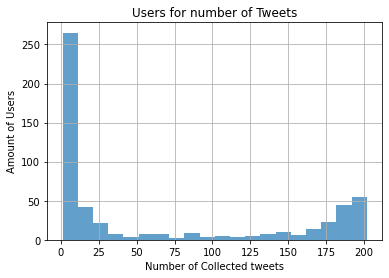

In [49]:
users_data['Collected_tweets'].hist(bins=20,alpha=0.7)
plt.xlabel('Number of Collected tweets')
plt.ylabel("Amount of Users")
plt.title('Users for number of Tweets')

In [50]:
users_data[users_data['Collected_tweets'] < 20].count()['user_id']


302

We can see that more than half of the users don't pass 20 tweets. Lets "Zoom in": Divide into two groups and visualize:

Text(0.5, 1.0, 'Users for number of Tweets - < 35')

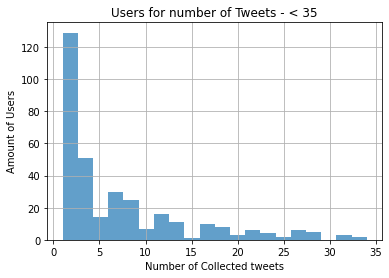

In [51]:
Below_35 = users_data[users_data['Collected_tweets'] < 35]
Below_35['Collected_tweets'].hist(bins=20,alpha=0.7)
plt.xlabel('Number of Collected tweets')
plt.ylabel("Amount of Users")
plt.title('Users for number of Tweets - < 35')

Text(0.5, 1.0, 'Users for number of Tweets - > 20')

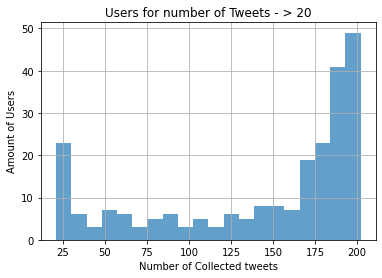

In [52]:
Above_20 = users_data[users_data['Collected_tweets'] > 20]
Above_20['Collected_tweets'].hist(bins=20,alpha=0.7)
plt.xlabel('Number of Collected tweets')
plt.ylabel("Amount of Users")
plt.title('Users for number of Tweets - > 20')

## Q5

Histogram that shows the amount of users for each number of **followers**:

In [53]:
users_data[users_data['followers_count'] > 3000000]


,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count,Num_words_in_desc,Is_celeb,Collected_tweets,Collected_tweets_percent
52,351921957,Ezequiel Lavezzi,PochoLavezzi,NaN,Ezequiel 'El Pocho' Lavezzi's Official Profile...,"{""url"": {""urls"": [{""url"": ""http://t.co/q6n6kz5...",0,5146847,279,4904,434,0,3011,0,1,8,8,Yes,9,0.002989
102,501583715,SENYORA,Senyora,Philippines,Fulltime Haciendera and Professional Husgadera...,"{""description"": {""urls"": []}}",0,5546663,83,973,7427,1,22959,1,1,8,8,Yes,25,0.001089
126,150832830,David Faitelson,Faitelson_ESPN,"San Diego, CA","AVISO LEGAL: Si nos envÃ­as un tweet, estÃ¡s p...","{""url"": {""urls"": [{""url"": ""https://t.co/C2q2SQ...",0,3586934,1149,7414,181,1,56844,1,1,24,24,Yes,9,0.000158
169,15872418,ABS-CBN News,ABSCBNNews,"Manila, Philippines","Stories, video, and multimedia for Filipinos w...","{""url"": {""urls"": [{""url"": ""https://t.co/e2NDE5...",0,6937466,1073,7370,1143,1,784302,1,1,19,19,Yes,144,0.000184
171,307426028,Lili Reinhart,lilireinhart,NaN,I take as many naps as I can.,"{""description"": {""urls"": []}}",0,3126154,237,1195,3194,0,7503,0,1,8,8,Yes,184,0.024524
227,330826792,Rappler,rapplerdotcom,Philippines,The Social News Network. Uncompromised journal...,"{""url"": {""urls"": [{""url"": ""https://t.co/tz2uMg...",0,3285280,403,3875,8072,1,670296,1,1,15,15,Yes,173,0.000258
242,268361752,SelecciÃ³n Nacional,miseleccionmx,Mexico,SelecciÃ³n Nacional de MÃ©xico | #PasiÃ³nyOrgu...,"{""url"": {""urls"": [{""url"": ""https://t.co/aUjIIu...",0,6104935,1484,4626,38778,1,118147,1,1,10,10,Yes,6,0.000051
273,39453212,GMA News,gmanews,Philippines,Welcome to the official Twitter account of GMA...,"{""url"": {""urls"": [{""url"": ""http://t.co/ml34b0g...",0,5728110,705,8364,15426,0,675604,1,1,12,12,Yes,143,0.000212
299,913812620,Posty,PostMalone,somewhere with Jazzy Eff,HOLLYWOODâS BLEEDING IS OUT NOW,"{""url"": {""urls"": [{""url"": ""https://t.co/2mjO2V...",0,6421604,2897,1993,17683,1,7742,1,1,5,5,Yes,163,0.021054
320,1852644804,Khalid,thegreatkhalid,"El Paso, Texas",22 â¢ Instagram: thegr8khalidâï¸:KhalidInf...,"{""url"": {""urls"": [{""url"": ""https://t.co/Jojt3F...",0,4661361,1400,1740,54370,1,58484,1,1,4,4,Yes,168,0.002873


Text(0.5, 1.0, 'Users for number of Followers')

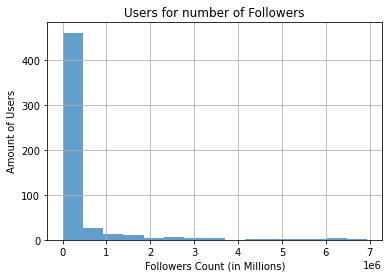

In [54]:
users_data['followers_count'].hist(bins=15,alpha=0.7)
plt.xlabel('Followers Count (in Millions)')
plt.ylabel("Amount of Users")
plt.title('Users for number of Followers')

The histogram above shows that most of the users are not celebs.

In [55]:
users_data[users_data['followers_count'] < 150].count()['user_id']


270

Half of the users have less than 150 followers! Lets zoom in.

Text(0.5, 1.0, 'Users for number of Followers - < 150')

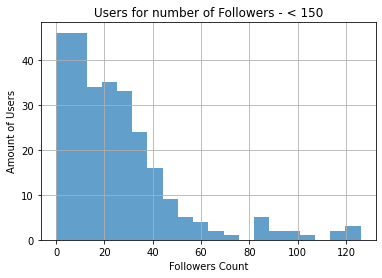

In [56]:
Below_150 = users_data[users_data['followers_count'] < 150]
Below_150['followers_count'].hist(bins=20,alpha=0.7)
plt.xlabel('Followers Count')
plt.ylabel("Amount of Users")
plt.title('Users for number of Followers - < 150')

Zoom out: we see that most of the population (users) have below than 250,000 followers.

In [57]:
users_data[users_data['followers_count'] < 250000].count()['user_id']

430

Text(0.5, 1.0, 'Users for number of Followers - > 250000')

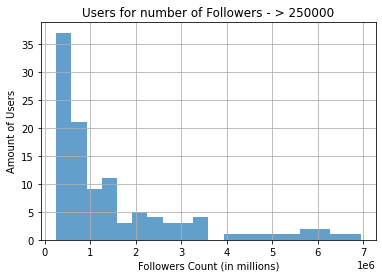

In [58]:
Above_250000 = users_data[users_data['followers_count'] > 250000]
Above_250000['followers_count'].hist(bins=20,alpha=0.7)
plt.xlabel('Followers Count (in millions)')
plt.ylabel("Amount of Users")
plt.title('Users for number of Followers - > 250000')

## Q6

Barchart - shows all the celebs:

Text(0.5, 1.0, 'Celebs number of followers - Top 10:')

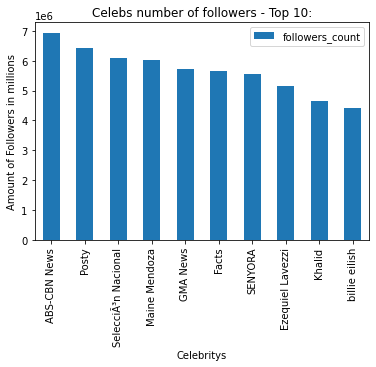

In [59]:
df_Q6 =users_data[['name','user_id','followers_count']]
df_Q6 = df_Q6.sort_values(by=['followers_count'],ascending=False)[0:10] # sorting and picking top 10
df_Q6.plot.bar(x = 'name' ,y ='followers_count' )
plt.xlabel("Celebritys")
plt.ylabel("Amount of Followers in millions")
plt.title('Celebs number of followers - Top 10:')


## Q7

In [60]:
df_Q7 =users_data[['statuses_count','followers_count']]
df_Q7 = df_Q7.sort_values(by=['statuses_count'],ascending=False)

Text(0.5, 1.0, 'Relation between Followers and Tweets:')

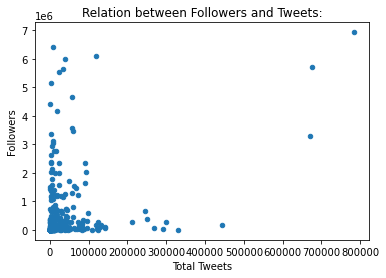

In [61]:
df_Q7.plot(kind='scatter', x='statuses_count', y='followers_count')
plt.xlabel("Total Tweets")
plt.ylabel("Followers")
plt.title('Relation between Followers and Tweets:')


In [62]:
df_Q7[df_Q7['statuses_count'] < 200].count()['statuses_count']

232

Text(0.5, 1.0, 'Relation between Followers and Tweets:')

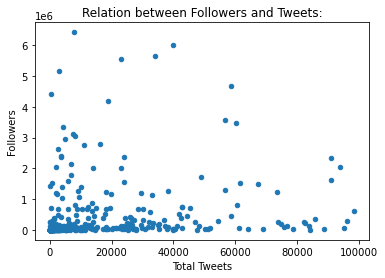

In [63]:
dfQ7p2 = df_Q7[df_Q7['statuses_count'] < 100000]
dfQ7p2.plot(kind='scatter', x='statuses_count', y='followers_count')
plt.xlabel("Total Tweets")
plt.ylabel("Followers")
plt.title('Relation between Followers and Tweets:')

In [64]:
top_10 = users_data[['name','user_id','followers_count','statuses_count']]
top_10.sort_values(by=['followers_count'],ascending=False)[0:10]

,name,user_id,followers_count,statuses_count
169,ABS-CBN News,15872418,6937466,784302
299,Posty,913812620,6421604,7742
242,SelecciÃ³n Nacional,268361752,6104935,118147
529,Maine Mendoza,63701775,6015330,39861
273,GMA News,39453212,5728110,675604
328,Facts,43042353,5649515,33913
102,SENYORA,501583715,5546663,22959
52,Ezequiel Lavezzi,351921957,5146847,3011
320,Khalid,1852644804,4661361,58484
430,billie eilish,2150327072,4411957,463


In [65]:
worst_10 = users_data[['name','user_id','followers_count','statuses_count']]
worst_10.sort_values(by=['followers_count'],ascending=True)[0:10]

,name,user_id,followers_count,statuses_count
49,ciko aculuduplaynow,942731472,0,4
162,brururu,2750073745,0,1
237,hildayani bustam,2229710126,1,14
272,Mohammad Shahanshah,2604716533,1,79
28,Darman Putra Bungsu,964126410,1,14
398,assir_09,1087855662,1,6
459,oddbod barber,90197913,1,2
269,Abayyganas,1949731154,1,14
512,Briana Garcia,923790313,2,4
308,alysaa,2192042172,2,3


We can see that tweeting a lot does not necessarily give you a lot of followers (billie eillish,  Mohammad Shahanshah).<br>
There could be other factors that contribute to having a lot of followers, but serious research needs to be done in order to be more certain.

## Q8

Text(0.5, 1.0, 'Relation between Friends and Tweets:')

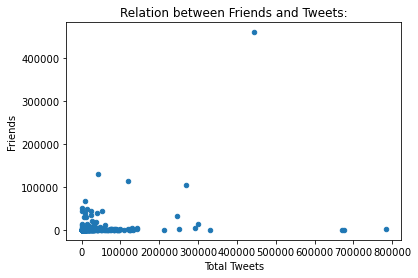

In [66]:
df_Q8 =users_data[['statuses_count','friends_count']]
df_Q8 = df_Q8.sort_values(by=['statuses_count'],ascending=False)
df_Q8.plot(kind='scatter', x='statuses_count', y='friends_count')
plt.xlabel("Total Tweets")
plt.ylabel("Friends")
plt.title('Relation between Friends and Tweets:')

Text(0.5, 1.0, 'Relation between Friends and Tweets:')

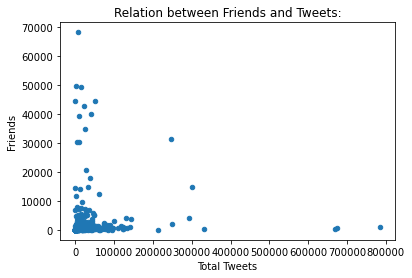

In [67]:
df_Q8[df_Q8['friends_count'] < 100000].count()
df_Q8[df_Q8['friends_count'] < 100000].plot(kind='scatter', x='statuses_count', y='friends_count')
plt.xlabel("Total Tweets")
plt.ylabel("Friends")
plt.title('Relation between Friends and Tweets:')

We can see from here that tweeting a lot does not necessarily bring you a lot of friends...

Export to csv:

In [69]:
LOCAL_DIRECTORY_PATH = r'C:\DataScienceIntro\tweets_monthly_summary.csv'
tweets_monthly_summary.to_csv (LOCAL_DIRECTORY_PATH, index = False, header=True , encoding = 'utf-8-sig') #Exporting the DF to a folder in our PC